# Image Naturalness Classifier

This Jupyter notebook presents experiments of training different classifiers on a numerical dataset that was generated to verify the naturalness of videos. The dataset contains various features that were extracted from a set of videos, and the goal is to train a classifier to predict whether an image is natural or not based on these features.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

The AdaBoost classifier is trained using a DecisionTree base estimator and is optimized using grid search to find the best hyperparameters. The performance of the classifier is evaluated using the F1 score on the training, validation, and test sets. Additionally, a Bagging classifier is trained on the same dataset for comparison. First sections in the notebook provides insights into the performance of AdaBoost and Bagging classifiers on a numerical dataset for image naturalness verification.

In [5]:
# load your data from a CSV file
df = pd.read_csv('Statistical_Video_Data.csv')
df.fillna(-1, inplace=True)
df = df.drop('video_name', axis=1)

# split the data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# extract the features and labels from the data
target_col = 'target_col'
X_train = train_df.drop(target_col, axis=1).values
y_train = train_df[target_col].values
X_val = val_df.drop(target_col, axis=1).values
y_val = val_df[target_col].values
X_test = test_df.drop(target_col, axis=1).values
y_test = test_df[target_col].values

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train F1 Score: 1.0
Validation F1 Score: 0.9473684210526316
Test F1 Score: 0.8275862068965518


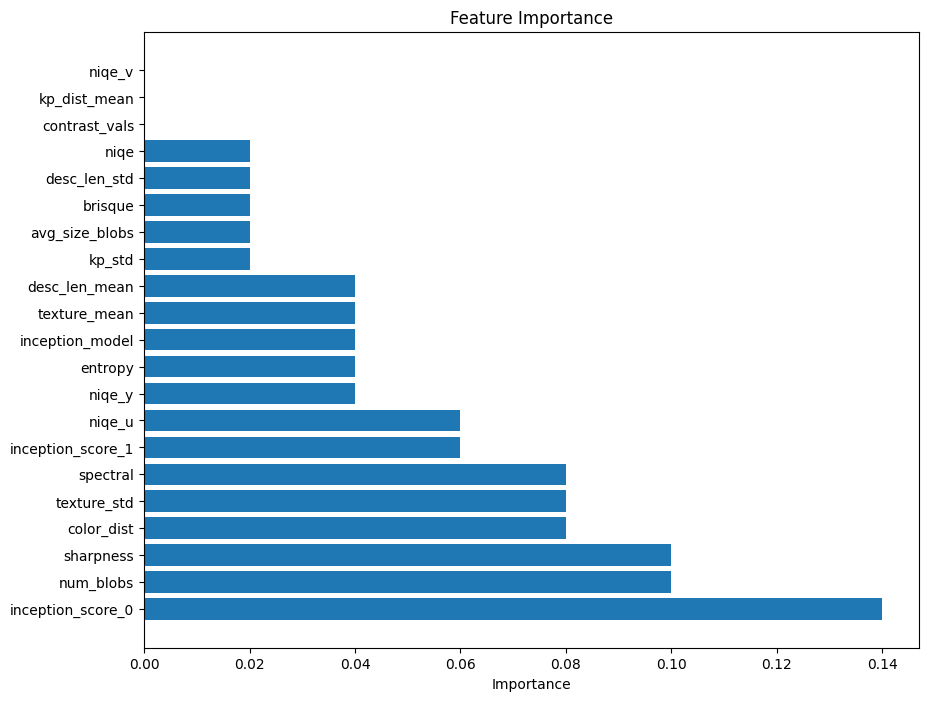

In [6]:
# create an Adaboost classifier with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# train the Adaboost classifier on the training data
adaboost.fit(X_train, y_train)

# predict labels on the training, validation, and test sets
y_train_pred = adaboost.predict(X_train)
y_val_pred = adaboost.predict(X_val)
y_test_pred = adaboost.predict(X_test)

# calculate f1 score on the training, validation, and test sets
train_f1_score = f1_score(y_train, y_train_pred)
val_f1_score = f1_score(y_val, y_val_pred)
test_f1_score = f1_score(y_test, y_test_pred)

print("Train F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)
print("Test F1 Score:", test_f1_score)

import matplotlib.pyplot as plt

# get feature names from the original dataframe
feature_names = train_df.drop(target_col, axis=1).columns.values

# get feature names and their corresponding importance values
feature_names = df.drop(target_col, axis=1).columns
importances = adaboost.feature_importances_

# sort the feature names based on their importance values
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(sorted_feature_names)), sorted_importances)
ax.set_yticks(range(len(sorted_feature_names)))
ax.set_yticklabels(sorted_feature_names)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

## Tuning parameters AdaBoost with GridSearch

In [7]:
# create AdaBoost and Bagging classifiers with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators)

# specify the hyperparameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3],
    'n_estimators': [50, 100, 200]
}

# perform grid search to find the best hyperparameters for AdaBoost
adaboost_gs = GridSearchCV(adaboost, param_grid, scoring='f1', cv=5)
adaboost_gs.fit(X_train, y_train)
# train the AdaBoost classifier on the training data using the best hyperparameters
best_adaboost = adaboost_gs.best_estimator_
best_adaboost.fit(X_train, y_train)

# predict labels on the training, validation, and test sets using the best AdaBoost classifier
y_train_pred_ab = best_adaboost.predict(X_train)
y_val_pred_ab = best_adaboost.predict(X_val)
y_test_pred_ab = best_adaboost.predict(X_test)

# calculate f1 score on the training, validation, and test sets
train_f1_score_ab = f1_score(y_train, y_train_pred_ab)
val_f1_score_ab = f1_score(y_val, y_val_pred_ab)
test_f1_score_ab = f1_score(y_test, y_test_pred_ab)

# print the feature importance and f1 scores for AdaBoost
print("AdaBoost Train F1 Score:", train_f1_score_ab)
print("AdaBoost Validation F1 Score:", val_f1_score_ab)
print("AdaBoost Test F1 Score:", test_f1_score_ab)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Train F1 Score: 1.0
AdaBoost Validation F1 Score: 0.9
AdaBoost Test F1 Score: 0.8275862068965518


## Comparing Tuned AdaBoost and BaggingClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

AdaBoost Train F1 Score: 1.0
AdaBoost Validation F1 Score: 0.9047619047619048
AdaBoost Test F1 Score: 0.8484848484848484
Bagging Train F1 Score: 0.9491525423728813
Bagging Validation F1 Score: 0.9230769230769231
Bagging Test F1 Score: 0.8125000000000001


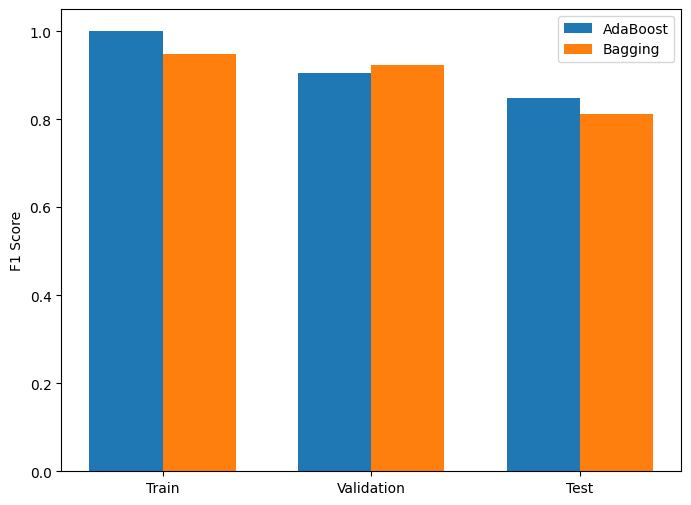

In [19]:
# create AdaBoost and Bagging classifiers with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators)

# specify the hyperparameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3],
    'n_estimators': [50, 100, 200]
}

# perform grid search to find the best hyperparameters for AdaBoost
adaboost_gs = GridSearchCV(adaboost, param_grid, scoring='f1', cv=5)
adaboost_gs.fit(X_train, y_train) # train the AdaBoost classifier on the training data using the best hyperparameters
best_adaboost = adaboost_gs.best_estimator_
best_adaboost.fit(X_train, y_train)

# perform grid search to find the best hyperparameters for Bagging
param_grid_bagging = {
    'base_estimator__max_depth': [1, 2, 3],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

bagging_gs = GridSearchCV(bagging, param_grid_bagging, scoring='f1', cv=5)
bagging_gs.fit(X_train, y_train) # train the Bagging classifier on the training data using the best hyperparameters
best_bagging = bagging_gs.best_estimator_
best_bagging.fit(X_train, y_train)

# predict labels on the training, validation, and test sets for AdaBoost
y_train_pred_ab = best_adaboost.predict(X_train)
y_val_pred_ab = best_adaboost.predict(X_val)
y_test_pred_ab = best_adaboost.predict(X_test)

# calculate f1 score on the training, validation, and test sets for AdaBoost
train_f1_score_ab = f1_score(y_train, y_train_pred_ab)
val_f1_score_ab = f1_score(y_val, y_val_pred_ab)
test_f1_score_ab = f1_score(y_test, y_test_pred_ab)

# predict labels on the training, validation, and test sets for Bagging
y_train_pred_bg = best_bagging.predict(X_train)
y_val_pred_bg = best_bagging.predict(X_val)
y_test_pred_bg = best_bagging.predict(X_test)

# calculate f1 score on the training, validation, and test sets for Bagging
train_f1_score_bg = f1_score(y_train, y_train_pred_bg)
val_f1_score_bg = f1_score(y_val, y_val_pred_bg)
test_f1_score_bg = f1_score(y_test, y_test_pred_bg)

# print the f1 scores for both AdaBoost and Bagging
print("AdaBoost Train F1 Score:", train_f1_score_ab)
print("AdaBoost Validation F1 Score:", val_f1_score_ab)
print("AdaBoost Test F1 Score:", test_f1_score_ab)
print("Bagging Train F1 Score:", train_f1_score_bg)
print("Bagging Validation F1 Score:", val_f1_score_bg)
print("Bagging Test F1 Score:", test_f1_score_bg)

# plot the f1 scores for both AdaBoost and Bagging
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Train', 'Validation', 'Test']
ab_scores = [train_f1_score_ab, val_f1_score_ab, test_f1_score_ab]
bg_scores = [train_f1_score_bg, val_f1_score_bg, test_f1_score_bg]
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, ab_scores, width, label='AdaBoost')
rects2 = ax.bar(x + width/2, bg_scores, width, label='Bagging')
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Based on the results obtained above, it can be observed that Adaboost has a slightly better overall performance compared to Bagging. Therefore, we will save the Adaboost model in a pickle file.

In [9]:
# to store trained model
import pickle
# save model to file
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(adaboost, f)

# XGBoost Classifier

To enhance the accuracy of our classifier, we tested the previously generated Adaboost model on new and unseen videos. Unfortunately, the results were not satisfactory, prompting us to explore alternative models. In light of this, we decided to train an XGBoost classifier and experiment with its performance. This would allow us to expand our approach and employ a more sophisticated model, thereby improving the overall quality of our classification system.

In [12]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
df = pd.read_csv('Statistical_Video_Data.csv')
df = df.drop('video_name', axis=1)
df.dropna(inplace=True) # dropping nan values
X = df.drop('target_col', axis=1)
y = df['target_col']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Hyperparameter Tuning
params = {
    'max_depth': [4, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}
# GridSearch
clf = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', random_state=42), params, cv=5)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

print("Best parameters found:")
print(clf.best_params_)
best_params = clf.best_params_

Accuracy:  0.7142857142857143
Best parameters found:
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.5}


In [13]:
# Make confidence score predictions on train, validation, and test sets
y_train_preds = clf.predict_proba(X_train)[:,1]
y_test_preds = clf.predict_proba(X_test)[:,1]

# Calculate F1 score, accuracy, and confusion matrix for train set
train_threshold = np.percentile(y_train_preds, 50)
y_train_preds_binary = np.where(y_train_preds >= train_threshold, 1, 0)
f1_train = f1_score(y_train, y_train_preds_binary)
acc_train = accuracy_score(y_train, y_train_preds_binary)
conf_train = confusion_matrix(y_train, y_train_preds_binary)


# Calculate F1 score, accuracy, and confusion matrix for test set
test_threshold = np.percentile(y_test_preds, 50)
y_test_preds_binary = np.where(y_test_preds >= test_threshold, 1, 0)
f1_test = f1_score(y_test, y_test_preds_binary)
acc_test = accuracy_score(y_test, y_test_preds_binary)
conf_test = confusion_matrix(y_test, y_test_preds_binary)

print("Train set F1 score: ", f1_train)
print("Train set accuracy: ", acc_train)
print("Train set confusion matrix: \n", conf_train)
print("\n")
print("Test set F1 score: ", f1_test)
print("Test set accuracy: ", acc_test)
print("Test set confusion matrix: \n", conf_test)
print("\n")

# Print confidence scores for first 10 rows of test set
print("Confidence scores for first 10 rows of test set: ")
print(y_test_preds[:10])

Train set F1 score:  0.9681528662420382
Train set accuracy:  0.967741935483871
Train set confusion matrix: 
 [[74  2]
 [ 3 76]]


Test set F1 score:  0.7407407407407408
Test set accuracy:  0.75
Test set confusion matrix: 
 [[11  4]
 [ 3 10]]


Confidence scores for first 10 rows of test set: 
[0.6183421  0.80800503 0.09930903 0.917902   0.09576118 0.16658059
 0.80436605 0.70389205 0.29638457 0.95873827]


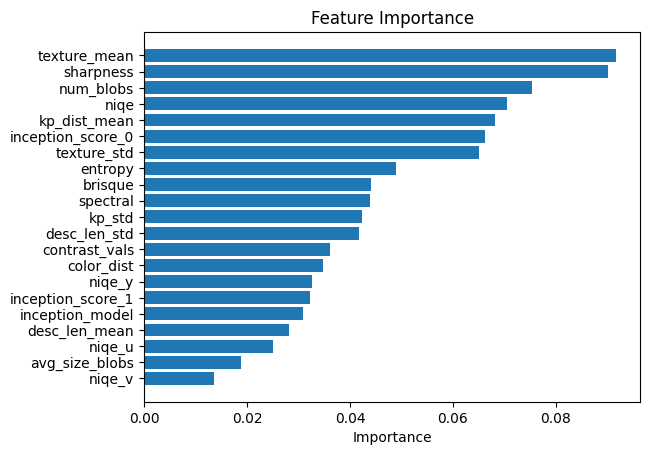

In [28]:
# Feature Importance Calculation
importance = clf.best_estimator_.feature_importances_
feature_names = X_train.columns
sorted_idx = importance.argsort()

# Plot the Feature Importance
fig, ax = plt.subplots()
ax.barh(range(len(sorted_idx)), importance[sorted_idx])
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
import pickle
# save model to file
with open('xgb_model_last.pkl', 'wb') as f:
    pickle.dump(clf, f)

### Merging two Adaboost and XGBoost
A soft voting method for margining the results of two classifiers was used. Each classifier assigns a probability or confidence level to each class for a given input, and then the final prediction is made by taking the weighted average of these probabilities. 

In [14]:
from sklearn.ensemble import VotingClassifier
# Define your voting classifier with the two classifiers
voting_clf = VotingClassifier(estimators=[('clf', clf), ('ada', adaboost)], voting='soft')

# Train the voting classifier on your training data
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on your test data
y_pred = voting_clf.predict(X_test)

# Print the confusion matrix, f1 score, and accuracy
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[10  5]
 [ 3 10]]
F1 Score: 0.7142857142857143
Accuracy: 0.7142857142857143


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


After merging the XGBoost and AdaBoost classifiers, we observed a decrease in performance on unseen data. As a result, we will be using the XGBoost classifier, as it demonstrated superior performance on the test data.